## What is Pytorch

<img src="PyTorch_Blog-Post_Hero.png" style="width: 700px;">


<br>
An open source deep learning platform that provides a seamless path from research prototyping to production deployment.

## Why Pytorch

<img src="r_1376371_EWibJ.jpg" height="100">

<br>

### HYBRID FRONT-END

A new hybrid front-end provides ease-of-use and flexibility in eager mode, while seamlessly transitioning to graph mode for speed, optimization, and functionality in C++ runtime environments.

### DISTRIBUTED TRAINING

Optimize performance in both research and production by taking advantage of native support for asynchronous execution of collective operations and peer-to-peer communication that is accessible from Python and C++.

### PYTHON-FIRST

PyTorch is not a Python binding into a monolithic C++ framework. It’s built to be deeply integrated into Python so it can be used with popular libraries and packages such as Cython and Numba.

### TOOLS & LIBRARIES

An active community of researchers and developers have built a rich ecosystem of tools and libraries for extending PyTorch and supporting development in areas from computer vision to reinforcement learning.

### NATIVE ONNX SUPPORT

Export models in the standard ONNX (Open Neural Network Exchange) format for direct access to ONNX-compatible platforms, runtimes, visualizers, and more.

## Simple Image Classification

### Importing Libraries

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import torchvision
import os
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import accuracy_score

In [2]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cpu')

In [3]:
def imshow(inp, title = None):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [4]:
root_folder = './Data/cifar10'

### Data Loading

In [20]:
img_size = 32
n_channels = 3
n_batches = 12

# Defining transforms to apply on images

train_transforms = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [21]:
# Fetching CIFAR10 datasets from web

train_dataset = datasets.CIFAR10(root = root_folder,
                                train = True,
                                transform = train_transforms,
                                target_transform = None,
                                download = True)
test_dataset = datasets.CIFAR10(root = root_folder,
                               train = False,
                               transform = train_transforms,
                               target_transform = None,
                               download = True)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
# Loading data into batches

train_dataloader = DataLoader(train_dataset,batch_size = n_batches,
                             shuffle = True, num_workers = 4)
test_dataloader = DataLoader(test_dataset, batch_size = n_batches,
                            shuffle = True, num_workers = 4)

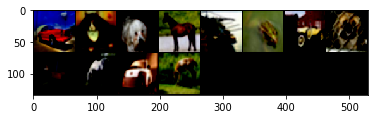

<Figure size 720x720 with 0 Axes>

In [9]:
inputs,labels = next(iter(train_dataloader))

out= torchvision.utils.make_grid(inputs)
imshow(out)

### Linear Classifier

In [47]:
class linear_classifier(nn.Module):
    def __init__(self, img_size, n_channels):
        super(linear_classifier, self).__init__()
        self.fc3 = nn.Linear(img_size * img_size * n_channels, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 124)
        self.fc6 = nn.Linear(124, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        return x


lin_class = linear_classifier(img_size, n_channels)

In [49]:
lin_class.parameters

<bound method Module.parameters of linear_classifier(
  (fc3): Linear(in_features=3072, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=124, bias=True)
  (fc6): Linear(in_features=124, out_features=10, bias=True)
)>

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lin_class.parameters(), lr = 0.001, momentum = 0.9)

In [92]:
n_epochs = 2

t = tqdm.tqdm_notebook(range(n_epochs))
k = tqdm.tqdm_notebook(train_dataloader)

for epoch in t:  # loop over the dataset multiple times

    running_loss = 0.0
    for data in k:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
#         optimizer.zero_grad()

        # forward + backward + optimize
        outputs = lin_class(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        k.set_description('Loss: %.3f' %loss)

    t.set_description('Avg. Loss: %.3f' %(running_loss/len(train_dataloader)))

print('Finished Training')

defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        [-5.6052e-45,  5.6052e-45,  5.6052

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})
defaultdict(<class 'dict'>, {Parameter containing:
tensor([[ 0.0020,  0.0047, -0.0062,  ...,  0.0113, -0.0075, -0.0187],
        [ 0.0033, -0.0105, -0.0158,  ...,  0.0007,  0.0069,  0.0053],
        [ 0.0153,  0.0051,  0.0135,  ...,  0.0171,  0.0028, -0.0073],
        ...,
        [-0.0121,  0.0028, -0.0128,  ...,  0.0216, -0.0008, -0.0007],
        [ 0.0017, -0.0099,  0.0009,  ..., -0.0095, -0.0030, -0.0050],
        [-0.0159,  0.0058,  0.0032,  ...,  0.0014, -0.0124,  0.0161]],
       requires_grad=True): {'momentum_buffer': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [ 5.6052e-45,  5.6052e-45,  5.6052e-45,  ...,  5.6052e-45,
          5.6052e-45,  5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45,  5.6052e-45,  5.6052e-45,  ..., -5.6052e-45,
 

        -5.6052e-45, -5.6052e-45, -5.6052e-45, -5.6052e-45,  5.6052e-45])}})


KeyboardInterrupt: 

In [14]:
acc_score = 0
for i,data in enumerate(test_dataloader, 0):
    inputs, labels= data
    
    outputs = lin_class(inputs)
    print('',labels.detach().numpy(),'\n',np.argmax(outputs.detach().numpy(),axis = 1))
    acc_score = acc_score + accuracy_score(labels.detach().numpy(), np.argmax(outputs.detach().numpy(),axis = 1))
    if i == 10:
        break
    
    
print('\n',acc_score/10)

 [6 3 6 7 4 2 0 1 4 7 7 9] 
 [6 3 2 4 2 2 0 1 4 6 7 4]
 [4 7 9 5 2 9 8 9 3 0 4 9] 
 [1 7 0 2 4 1 8 1 6 0 4 0]
 [5 0 0 0 2 3 4 0 7 6 3 0] 
 [6 0 8 4 0 4 2 0 3 4 2 0]
 [8 6 1 9 6 0 7 1 3 3 4 7] 
 [8 6 1 1 6 8 3 8 5 3 4 7]
 [0 3 9 1 2 5 4 8 4 4 2 0] 
 [0 4 9 1 2 2 5 8 2 4 7 0]
 [3 7 9 1 3 7 0 5 7 7 2 9] 
 [3 4 9 0 3 7 0 6 5 6 4 7]
 [4 6 3 0 6 2 5 0 4 3 9 0] 
 [5 6 4 0 4 6 5 0 4 5 7 1]
 [5 1 7 0 3 1 1 9 3 1 0 3] 
 [7 1 7 0 5 0 1 9 1 4 9 6]
 [8 0 7 9 2 4 4 0 7 1 2 6] 
 [8 0 7 9 4 0 4 0 7 1 6 6]
 [0 3 3 2 1 6 4 1 3 3 7 0] 
 [7 0 4 5 4 6 5 1 5 3 8 8]
 [8 6 6 3 4 8 0 0 0 7 6 7] 
 [8 6 6 5 6 8 0 0 0 3 4 7]

 0.525


### Convolution Classifier

<img src="Capture.PNG" style="width: 700px; height: 300px;">

In [94]:
class classifier(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 avg_pool_size=2,
                 stride=1):
        
        super(classifier, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size)
        self.conv2 = nn.Conv2d(out_channels, out_channels * 2, kernel_size)
        self.conv3 = nn.Conv2d(out_channels * 2, out_channels * 3, kernel_size)
        self.avgpool = nn.AvgPool2d(avg_pool_size)
        self.fc1 = nn.Linear(out_channels * 3 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 72)
        self.fc3 = nn.Linear(72, 10)

        
    def forward(self, x):
        x = self.conv1(x)
        print(x.size())
        x= self.avgpool(F.relu(x))
        print(x.size())
#         x = self.avgpool(F.relu(self.conv1(x)))
#         print(x.size())
        x = self.avgpool(F.relu(self.conv2(x)))
        print(x.size())
        x = self.avgpool(F.relu(self.conv3(x)))
        print(x.size())
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x


dis_class = classifier(in_channels=3,
                       out_channels=32,
                       kernel_size=3,
                       avg_pool_size=2,
                       stride=1)
# dis_class.cuda()

In [95]:
criterion_conv = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(dis_class.parameters(), lr = 0.001, momentum = 0.9)

In [96]:
n_epochs = 2
t = tqdm.tqdm_notebook(range(n_epochs))
k = tqdm.tqdm_notebook(train_dataloader)

for epoch in t:  # loop over the dataset multiple times

    running_loss = 0.0
    for data in k:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer_conv.zero_grad()

        # forward + backward + optimize
        outputs = dis_class(inputs)
        loss = criterion_conv(outputs, labels)
        loss.backward()
        optimizer_conv.step()

        # print statistics
        running_loss += loss.item()
        k.set_description('Loss: %.3f' %loss)
        
    t.set_description('Avg. Loss: %.3f' %(running_loss/len(train_dataloader)))

print('Finished Training')

torch.Size([12, 32, 30, 30])
torch.Size([12, 32, 15, 15])
torch.Size([12, 64, 6, 6])
torch.Size([12, 96, 2, 2])


RuntimeError: shape '[12, 1]' is invalid for input of size 4608

In [18]:
for i,data in enumerate(test_dataloader, 0):
    inputs, labels= data
    
    outputs = dis_class(inputs)
    print('',labels.detach().numpy(),'\n',np.argmax(outputs.detach().numpy(),axis = 1))
    break

print('\n',accuracy_score(labels.detach().numpy(), np.argmax(outputs.detach().numpy(),axis = 1)))

 [2 6 6 2 6 7 4 4 9 5 4 8] 
 [0 0 0 0 0 0 0 0 0 0 0 0]

 0.0


### Generalizing Convolution Network

In [33]:
class classifier_gen(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 avg_pool_size=2,
                 stride=1, drpout = 0.25):
        
        super(classifier_gen, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size)
        self.conv2 = nn.Conv2d(out_channels, out_channels * 2, kernel_size)
        self.conv3 = nn.Conv2d(out_channels * 2, out_channels * 3, kernel_size)
        self.avgpool = nn.AvgPool2d(avg_pool_size)
        self.dropout = nn.Dropout2d(drpout)
        self.fc1 = nn.Linear(out_channels * 3 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 72)
        self.fc3 = nn.Linear(72, 10)

    def forward(self, x):
        #         print(x.size())
        x = self.avgpool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        #         print(x.size())
        x = self.avgpool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        #         print(x.size())
        x = self.avgpool(F.relu(self.conv3(x)))
#         print(x.size())
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x


dis_class_gen = classifier_gen(in_channels=3,
                       out_channels=32,
                       kernel_size=3,
                       avg_pool_size=2,
                       stride=1, drpout = 0.25)

In [34]:
criterion_conv_gen = nn.CrossEntropyLoss()
optimizer_conv_gen = optim.SGD(dis_class_gen.parameters(), lr = 0.001, momentum = 0.9)

In [35]:
n_epochs = 2
t = tqdm.tqdm_notebook(range(n_epochs))
k = tqdm.tqdm_notebook(train_dataloader)

for epoch in t:  # loop over the dataset multiple times

    running_loss = 0.0
    for data in k:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer_conv_gen.zero_grad()

        # forward + backward + optimize
        outputs = dis_class_gen(inputs)
        loss = criterion_conv_gen(outputs, labels)
        loss.backward()
        optimizer_conv_gen.step()

        # print statistics
        running_loss += loss.item()
        k.set_description('Loss: %.3f' %loss)
        
    t.set_description('Avg. Loss: %.3f' %(running_loss/len(train_dataloader)))

print('Finished Training')

Finished Training


In [37]:
acc_score = 0
for i,data in enumerate(test_dataloader, 0):
    inputs, labels= data
    
    outputs = dis_class_gen(inputs)
    print('',labels.detach().numpy(),'\n',np.argmax(outputs.detach().numpy(),axis = 1))
    acc_score = acc_score + accuracy_score(labels.detach().numpy(), np.argmax(outputs.detach().numpy(),axis = 1))
    if i == 10:
        break
    
print('\n',acc_score/10)

 [1 9 0 3 1 3 0 7 8 7 9 6] 
 [6 9 6 6 1 6 8 9 8 7 8 3]
 [4 5 4 3 9 4 2 9 0 1 9 7] 
 [6 6 0 1 9 6 7 9 0 1 9 9]
 [3 7 4 4 2 8 0 7 3 5 2 5] 
 [6 9 7 7 8 8 0 7 7 5 1 7]
 [4 6 4 0 1 6 5 7 0 4 4 5] 
 [6 6 6 1 9 7 5 9 0 8 3 7]
 [7 5 6 2 9 7 8 2 0 4 7 2] 
 [1 9 6 6 7 5 8 6 9 6 7 0]
 [7 3 2 7 1 2 7 3 3 9 7 0] 
 [6 1 3 9 1 0 7 6 7 9 7 7]
 [2 6 8 2 1 4 3 6 2 4 0 2] 
 [0 6 8 0 1 6 6 6 5 6 1 1]
 [5 9 6 2 6 5 2 1 0 3 2 4] 
 [7 1 4 6 7 7 4 1 0 3 6 7]
 [2 4 7 6 8 4 6 0 1 2 6 9] 
 [7 8 1 4 9 7 7 0 1 7 6 9]
 [4 9 1 7 7 6 2 3 6 6 0 6] 
 [6 9 1 7 3 6 6 1 7 6 0 6]
 [0 4 6 6 3 3 5 4 3 6 7 9] 
 [8 6 6 6 5 5 9 4 5 6 4 9]

 0.38333333333333336


### Transfer Learning (VGG 16)

In [39]:
import torchvision.models as models

vgg16 = models.vgg16_bn(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to C:\Users\as19238/.torch\models\vgg16_bn-6c64b313.pth
553507836it [01:06, 8261524.65it/s] 


In [40]:
print(vgg16.classifier[6].out_features)

for param in vgg16.features.parameters():
    param.require_grad = False
    
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1]


features.extend([nn.Linear(num_features, 10)])
vgg16.classifier = nn.Sequential(*features)

1000


In [42]:
criterion = nn.CrossEntropyLoss()
optimizer_vgg = optim.SGD(vgg16.parameters(), lr = 0.001 , momentum = 0.9)

In [44]:
n_epochs = 2
t = tqdm.tqdm_notebook(range(n_epochs))
k = tqdm.tqdm_notebook(train_dataloader)

for epoch in t:  # loop over the dataset multiple times

    running_loss = 0.0
    for data in k:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer_vgg.zero_grad()

        # forward + backward + optimize
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_vgg.step()

        # print statistics
        running_loss += loss.item()
        k.set_description('Loss: %.3f' %loss)
        
    t.set_description('Avg. Loss: %.3f' %(running_loss/len(train_dataloader)))

print('Finished Training')

KeyboardInterrupt: 

In [43]:
acc_score = 0
for i,data in enumerate(test_dataloader, 0):
    inputs, labels= data
    
    outputs = vgg16(inputs)
    print('',labels.detach().numpy(),'\n',np.argmax(outputs.detach().numpy(),axis = 1))
    acc_score = acc_score + accuracy_score(labels.detach().numpy(), np.argmax(outputs.detach().numpy(),axis = 1))
    if i == 10:
        break
    
print('\n',acc_score/10)

 [4 6 5 6 7 5 4 5 3 1 1 2] 
 [8 0 9 6 8 8 6 9 6 8 3 5]
 [7 5 5 8 1 8 3 8 9 8 5 0] 
 [0 7 1 4 3 2 6 9 5 9 1 2]
 [3 0 2 9 8 7 4 7 9 8 4 3] 
 [5 1 7 2 9 1 8 8 4 5 3 0]
 [1 7 5 9 9 3 2 6 3 8 8 5] 
 [9 9 9 0 6 4 8 9 2 1 8 8]
 [0 6 5 5 0 2 8 7 9 0 3 3] 
 [1 6 0 9 9 5 9 4 5 0 0 1]
 [2 9 2 8 3 5 7 1 2 8 1 8] 
 [6 5 6 0 1 8 2 3 8 6 8 9]
 [3 4 5 1 4 3 1 8 4 8 9 5] 
 [6 9 9 1 3 1 5 8 6 0 2 8]
 [2 7 3 5 1 7 5 0 4 3 0 7] 
 [6 4 7 9 4 7 6 3 6 8 0 6]
 [9 7 3 9 2 6 1 6 1 3 8 0] 
 [2 1 7 5 8 5 0 9 0 0 4 9]
 [2 4 2 3 1 0 2 0 4 0 0 2] 
 [4 8 9 8 5 3 8 3 2 5 5 0]
 [0 8 7 7 0 2 3 0 3 0 7 8] 
 [1 4 9 1 8 8 5 6 7 3 4 9]

 0.06666666666666667


## Demo Backward Function

In [81]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2), requires_grad = True)
y = Variable(torch.rand(2,2), requires_grad = True)


z = x*y
# z = torch.add(x,y)
# y.backward()

In [84]:
out = z.mean()

In [85]:
out.backward()

In [89]:
print(y.grad)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [88]:
print(x.grad)

tensor([[0.1599, 0.0490],
        [0.2030, 0.1384]])


In [70]:
y = Variable(torch.ones(2,2), requires_grad = True)


In [76]:
z

tensor([[2., 2.],
        [2., 2.]], requires_grad=True)

In [71]:
z = Variable(y * y * 2,requires_grad = True)
out = z.mean()

In [72]:
out

tensor(2., grad_fn=<MeanBackward1>)

In [73]:
out.backward()

In [74]:
out

tensor(2., grad_fn=<MeanBackward1>)

In [75]:
z.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])